# Stock market analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Get the data
### Tesla stock (ticker: TSLA on the NASDAQ)
Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.

Note that you will encounter `ImmediateDeprecationError: Google finance has been immediately deprecated due to large breaks in the API without the introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.` while using `web.DataReader("TSLA", 'google', start, end)`. Alternatives to Google Finance include Alpha Vantage, Quandl, and IEX. Here I choose Yahoo Finance.

In [2]:
import pandas_datareader
import pandas_datareader.data as web
import datetime

In [4]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)
tesla = web.DataReader("TSLA", 'yahoo', start, end)

In [5]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [6]:
tesla.drop('Adj Close', axis=1, inplace=True)

In [7]:
tesla.head()

,High,Low,Open,Close,Volume
Date,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000


In [10]:
tesla.to_csv('datasets/tesla_stock.csv')

### Other car companies
Repeat the same steps to grab data for Ford and GM (General Motors).

In [12]:
ford = web.DataReader("F", 'yahoo', start, end)
gm = web.DataReader("GM", 'yahoo', start, end)

In [14]:
ford.drop('Adj Close', axis=1, inplace=True)

In [15]:
ford.to_csv('datasets/ford_stock.csv')

In [16]:
gm.drop('Adj Close', axis=1, inplace=True)

In [17]:
gm.to_csv('datasets/gm_stock.csv')

## Data visualization

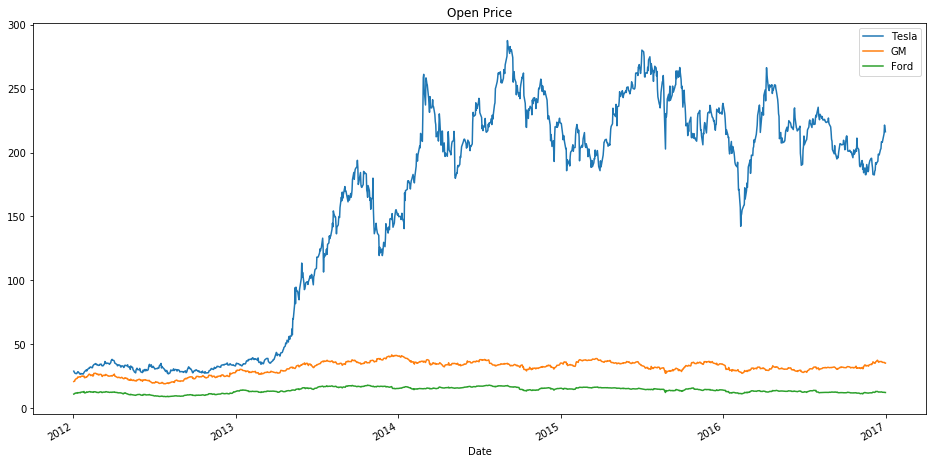

In [18]:
tesla['Open'].plot(label='Tesla', figsize=(16, 8), title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

Plot the Volume of stock traded each day.

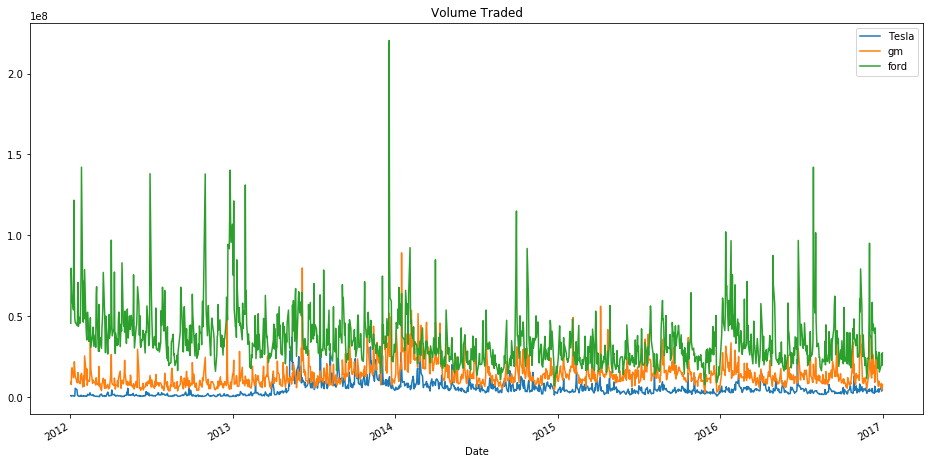

In [21]:
tesla['Volume'].plot(label='Tesla', figsize=(16, 8), title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

Looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford? What happened that day?

In [20]:
ford['Volume'].argmax()

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2013-12-18 00:00:00')

What happened?
* http://money.cnn.com/2013/12/18/news/companies/ford-profit/
* https://www.usatoday.com/story/money/cars/2013/12/18/ford-2014-profit-warning/4110015/
* https://media.ford.com/content/dam/fordmedia/North%20America/US/2014/01/28/4QFinancials.pdf

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each).

Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded. And plot this "Total Traded" against the time index.

In [22]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

Text(0,0.5,'Total Traded')

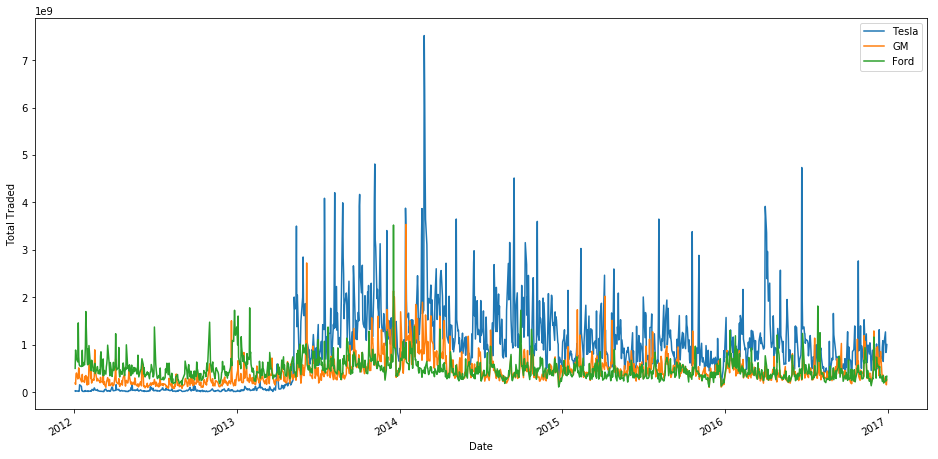

In [23]:
tesla['Total Traded'].plot(label='Tesla', figsize=(16, 8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

Looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened?

In [24]:
tesla['Total Traded'].argmax()

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-02-25 00:00:00')

* http://money.cnn.com/2014/02/25/investing/tesla-record-high/
* https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/
* https://www.washingtonpost.com/news/wonk/wp/2014/02/25/teslas-stock-is-up-644-why-it-may-not-last/
* http://www.cnbc.com/2014/02/25/tesla-soars-ford-falls-in-consumer-reports-study.html

Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM.